In [13]:
import pandas as pd
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk
import re
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/omkarkhanvilkar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/omkarkhanvilkar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
df_tools = pd.read_csv("13-tools.csv")

In [15]:
df_app = pd.read_csv("13-apps.csv")

In [16]:
df_app

,A,B,C,D,E,F
0,aaacgchgc,ealcobaca/pymfe,pymfe/complexity.py,2f9f04b156b38211e1c7e4dd83d89b293536e638,ef0851ba097fb99a539bd52a6cf0a6baa90e32d5,get min max for all columns by class
1,aaacgchge,ealcobaca/pymfe,pymfe/complexity.py,2f9f04b156b38211e1c7e4dd83d89b293536e638,ef0851ba097fb99a539bd52a6cf0a6baa90e32d5,columns. --> features
2,aaacgchgg,ealcobaca/pymfe,pymfe/complexity.py,55be17a227ae8d93ccaa4f43de33077068dd695b,STILL_EXISTS,I think we could improve this part of the code
3,aaacgchha,ealcobaca/pymfe,pymfe/complexity.py,9349988f7ff657c015c832b69a6db1a24bb4675d,STILL_EXISTS,removing the most efficient feature
4,aaacgdhci,ealcobaca/pymfe,pymfe/complexity.py,70e58ce4494a521fabb30b96657629b9542b63f1,2d382ec699f34b2b76c1b4be235f4fab426ba594,TODO: the MFE (R version) implements the non-o...
...,...,...,...,...,...,...
40987,aajhbiabc,mozilla/TTS,layers/common_layers.py,926a4d36cedc9f53800f18196dbc27f80d9784c8,6f3dd1b6aedbb77de20b34b8494201c7d8af0c13,TODO try sigmoid here
40988,aajhbiceb,mozilla/TTS,utils/synthesis.py,bc6764a5c7c58463d2a879f54ca0cc390ca69070,8feb326a60fce455ba439d4e1fb7bf0e66642bd4,TODO: perform GL with pytorch for batching
40989,aajhbjgcf,mozilla/TTS,vocoder/layers/losses.py,3eb730acf0a660d96f3af78cde0f5379b72fb3c6,0bb0ba182e24ed84880f95f5f2dc8586409c6ff9,TODO: this might be wrong
40990,aajhcbejc,mozilla/TTS,TTS/tts/utils/generic_utils.py,9033070b8f622b3365162bcfaa20f57e77bb6f83,227b9c886429f3f8f8074f5377646cd5bbc58ba8,most stupid code ever -- Fix it !


In [17]:
df_tools['link'] = "https://github.com/" + df_tools['B'] + "/" + "commit/" + df_tools['D']

In [18]:
df_app['link'] = "https://github.com/" + df_app['B'] + "/" + "commit/" + df_app['D']

In [19]:
df_app = df_app.iloc[:, -2:]

In [20]:
df_tools = df_tools.iloc[:, -2:]

In [21]:
# Define the regular expression pattern to match function names with words joined by underscores
pattern = r'\b[a-zA-Z_][a-zA-Z0-9_]*(?:_[a-zA-Z0-9_]+)+\b'

# Function to replace function names in comments with "function_name"
def replace_function_names(comment):
    if isinstance(comment, str):
        return re.sub(pattern, 'function_name', comment)
    else:
        return comment

# Apply the function to replace function names in the 'comments' column
df_tools['F'] = df_tools['F'].apply(replace_function_names)

In [22]:
pattern = r'\b[a-zA-Z_][a-zA-Z0-9_]*(?:_[a-zA-Z0-9_]+)+\b'

# Function to replace function names in comments with "function_name"
def replace_function_names(comment):
    return re.sub(pattern, 'function_name', comment)

# Apply the function to replace function names in the 'comments' column
df_app['F'] = df_app['F'].apply(replace_function_names)


In [23]:
df_app

,F,link
0,get min max for all columns by class,https://github.com/ealcobaca/pymfe/commit/2f9f...
1,columns. --> features,https://github.com/ealcobaca/pymfe/commit/2f9f...
2,I think we could improve this part of the code,https://github.com/ealcobaca/pymfe/commit/55be...
3,removing the most efficient feature,https://github.com/ealcobaca/pymfe/commit/9349...
4,TODO: the MFE (R version) implements the non-o...,https://github.com/ealcobaca/pymfe/commit/70e5...
...,...,...
40987,TODO try sigmoid here,https://github.com/mozilla/TTS/commit/926a4d36...
40988,TODO: perform GL with pytorch for batching,https://github.com/mozilla/TTS/commit/bc6764a5...
40989,TODO: this might be wrong,https://github.com/mozilla/TTS/commit/3eb730ac...
40990,most stupid code ever -- Fix it !,https://github.com/mozilla/TTS/commit/9033070b...


In [24]:
df_tools['F'] = df_tools['F'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).str.lower()

In [25]:
df_app['F'] = df_app['F'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).str.lower()

In [26]:
result_df = pd.concat([df_tools, df_app], axis=0, ignore_index=True)

In [27]:
# Keep only unique entries
unique_df = result_df.drop_duplicates()

In [28]:
unique_df['F'] = unique_df['F'].drop_duplicates()

/var/folders/gs/zcwj00xj1v5bjtgk63027r4h0000gn/T/ipykernel_27783/1595382541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['F'] = unique_df['F'].drop_duplicates()


In [29]:
duplicates_count = unique_df['F'].duplicated().sum()

In [30]:
df_unique = unique_df.drop_duplicates(subset=['F'])

In [31]:
df_unique.reset_index(inplace=True,drop=True)

In [32]:
df_unique

,F,link
0,todo this function needs a generalisation to l...,https://github.com/georgesterpu/avsr-tf1/commi...
1,todo cba two stacked lists of inputs,https://github.com/georgesterpu/avsr-tf1/commi...
2,area better when decimating,https://github.com/georgesterpu/avsr-tf1/commi...
3,todo potentially broken please recheck,https://github.com/georgesterpu/avsr-tf1/commi...
4,r todo properly normalise the scores to...,https://github.com/georgesterpu/avsr-tf1/commi...
...,...,...
42959,fixme missing functionname parameter to tacotr...,https://github.com/mozilla/TTS/commit/11e78953...
42960,fixme missing functionname parameter to tacotr...,https://github.com/mozilla/TTS/commit/11e78953...
42961,todo try sigmoid here,https://github.com/mozilla/TTS/commit/926a4d36...
42962,todo perform gl with pytorch for batching,https://github.com/mozilla/TTS/commit/bc6764a5...


In [33]:
stop_words = set(stopwords.words('english'))
word_counts = Counter()
for sentence in df_unique['F']:
    if pd.notna(sentence):  # Check for NaN values
        words = word_tokenize(str(sentence).lower())  # Tokenize and convert to lowercase
        filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
        word_counts.update(filtered_words)

# Get the top 50 word counts
top_50_words = word_counts.most_common(50)

print("Top 50 words and their counts:")
print(top_50_words)


Top 50 words and their counts:
[('todo', 21184), ('functionname', 7909), ('needed', 3592), ('columns', 2721), ('xxx', 2271), ('use', 2153), ('add', 2129), ('data', 2056), ('fixme', 2000), ('model', 1653), ('better', 1650), ('fix', 1586), ('check', 1399), ('make', 1332), ('implement', 1302), ('remove', 1257), ('test', 1245), ('move', 1208), ('need', 1174), ('hack', 1119), ('set', 1076), ('using', 1070), ('way', 1056), ('used', 1022), ('class', 1013), ('one', 960), ('function', 938), ('file', 907), ('maybe', 890), ('code', 880), ('number', 862), ('array', 846), ('python', 846), ('support', 841), ('example', 808), ('work', 803), ('also', 793), ('method', 762), ('return', 745), ('new', 729), ('get', 719), ('values', 716), ('list', 710), ('training', 708), ('instead', 676), ('module', 670), ('type', 670), ('may', 663), ('x', 662), ('handle', 653)]


In [34]:
hyper_count = df_unique['F'].str.contains('performance', case=False, regex=True).sum()

In [35]:
hyper_count

344

In [36]:
both_count = df_unique['F'].str.contains('hyper', case=False, regex=True) & df_unique['F'].str.contains('param', case=False, regex=True)

In [37]:
both_count.value_counts()

False    42859
True       105
Name: F, dtype: int64

In [38]:
#HYPER

In [39]:
df_hyper = df_unique[df_unique['F'].str.contains('hyper', case=False, regex=True,na=False)]

In [40]:
df_hyper.reset_index(inplace=True,drop=True)

In [41]:
df_hyper

,F,link
0,with hyperparameters functionname returns para...,https://github.com/openml/openml-python/commit...
1,perrone et al 2018 a tutorial on how to...,https://github.com/openml/openml-python/commit...
2,we can see all the hyperparameter names in the...,https://github.com/openml/openml-python/commit...
3,expert learning this module regroups a vari...,https://github.com/online-ml/river/commit/4d2a...
4,fixme 2 assumes hyperthreading fix this properly,https://github.com/CPJKU/madmom/commit/7314fb5...
...,...,...
124,future tests to implement ...,https://github.com/BYU-PCCL/holodeck/commit/7c...
125,todo for future needs for now hyperdash is too...,https://github.com/catalyst-team/catalyst/comm...
126,xxx no column hyper transitions in lovecat,https://github.com/probcomp/bayeslite/commit/7...
127,todo needs to also deploy the hyperparameter c...,https://github.com/autonomio/talos/commit/b764...


In [42]:
df_hyper.to_excel("Extracted data/df_hyper.xlsx",index=False)

In [43]:
#LAYER

In [44]:
df_layer = df_unique[df_unique['F'].str.contains('layer', case=False, regex=True,na=False)]

In [45]:
df_layer.reset_index(inplace=True,drop=True)

In [46]:
df_layer

,F,link
0,todo more simple way to deserialize the layers...,https://github.com/tensorflow/addons/commit/f1...
1,todo fix the bug thats causing layer test to r...,https://github.com/tensorflow/addons/commit/28...
2,todo experiment with more layers,https://github.com/feedly/transfer-nlp/commit/...
3,unfreezing the fc2 layer for extra tuning if...,https://github.com/feedly/transfer-nlp/commit/...
4,this file contains models presented in the t...,https://github.com/feedly/transfer-nlp/commit/...
...,...,...
415,todo add support for any internal layer,https://github.com/pyannote/pyannote-audio/com...
416,needed to register pyannoteaudios own keras la...,https://github.com/pyannote/pyannote-audio/com...
417,todo learn feature normalization and store it ...,https://github.com/pyannote/pyannote-audio/com...
418,todo add option to not use bias in classificat...,https://github.com/pyannote/pyannote-audio/com...


In [47]:
df_layer.to_excel("Extracted data/df_layer.xlsx",index=False)

In [48]:
#duplicate

In [49]:
df_duplicate = df_unique[df_unique['F'].str.contains('duplicate', case=False, regex=True) |df_unique['F'].str.contains('repeat', case=False, regex=True)]

In [50]:
df_duplicate.reset_index(inplace=True,drop=True)

In [51]:
df_duplicate['F'][5]

'todo remove duplicate code with files'

In [52]:
df_duplicate.to_excel("Extracted data/df_duplicate.xlsx",index=False)

In [53]:
#model

In [54]:
df_model = df_unique[df_unique['F'].str.contains('model', case=False, regex=True,na=False)]

In [55]:
df_model.reset_index(inplace=True,drop=True)

In [56]:
df_model

,F,link
0,todo use modelforge to save the model,https://github.com/src-d/ml/commit/4bdc930b3ed...
1,while serializing the model with joblib is oft...,https://github.com/openml/openml-python/commit...
2,todo if possible give a warning if model is al...,https://github.com/openml/openml-python/commit...
3,todo add test about initializing a model from ...,https://github.com/openml/openml-python/commit...
4,fixme strmodel might contain,https://github.com/openml/openml-python/commit...
...,...,...
1432,read it manually instead of with gensim so we ...,https://github.com/plasticityai/magnitude/comm...
1433,u the makevocab subcommand allows you to crea...,https://github.com/plasticityai/magnitude/comm...
1434,u a classallennlpdatafieldsfieldfield is some...,https://github.com/plasticityai/magnitude/comm...
1435,u an implementation of the openai transformer...,https://github.com/plasticityai/magnitude/comm...


In [57]:
df_model.to_excel("Extracted data/df_model.xlsx",index=False)

In [58]:
#performance

In [59]:
df_performance = df_unique[df_unique['F'].str.contains('performance', case=False, regex=True,na=False)]

In [60]:
df_performance.reset_index(inplace=True,drop=True)

In [61]:
df_performance

,F,link
0,other example but it includes some basic perfo...,https://github.com/ageitgey/face_recognition/c...
1,metrics to assess performance on sequence labe...,https://github.com/chakki-works/seqeval/commit...
2,todo improve performance currently reads the w...,https://github.com/openml/openml-python/commit...
3,fetching evaluations evalutions conta...,https://github.com/openml/openml-python/commit...
4,we shall now analyse how the performance of va...,https://github.com/openml/openml-python/commit...
...,...,...
339,todo performance optimize this by only creatin...,https://github.com/IDSIA/sacred/commit/cc9e6fb...
340,is added as it would likely degrade performance,https://github.com/pyannote/pyannote-audio/com...
341,theres performance issues with a large amount ...,https://github.com/jupyter-incubator/sparkmagi...
342,a productionquality purepython wsgi server wit...,https://github.com/DragonComputer/Dragonfire/c...


In [62]:
df_performance.to_excel("Extracted data/df_performance.xlsx",index=False)

In [63]:
# df_hyper, df_layer, df_duplicate, df_model, df_performance
# Creating a new dataframe with the desired structure
combined_df = pd.DataFrame()

# Adding the first column with all the entries from each dataframe
combined_df['Comments'] = pd.concat([df_hyper.iloc[:, 0], df_layer.iloc[:, 0],
                                            df_duplicate.iloc[:, 0], df_model.iloc[:, 0],
                                            df_performance.iloc[:, 0]], ignore_index=True)

# Adding the additional columns with 1s and 0s based on the conditions
combined_df['hyper'] = [1 if i < len(df_hyper) else 0 for i in range(len(combined_df))]
combined_df['layer'] = [1 if len(df_hyper) <= i < len(df_hyper) + len(df_layer) else 0 for i in range(len(combined_df))]
combined_df['duplicate'] = [1 if len(df_hyper) + len(df_layer) <= i < len(df_hyper) + len(df_layer) + len(df_duplicate) else 0 for i in range(len(combined_df))]
combined_df['model'] = [1 if len(df_hyper) + len(df_layer) + len(df_duplicate) <= i < len(df_hyper) + len(df_layer) + len(df_duplicate) + len(df_model) else 0 for i in range(len(combined_df))]
combined_df['performance'] = [1 if len(df_hyper) + len(df_layer) + len(df_duplicate) + len(df_model) <= i else 0 for i in range(len(combined_df))]


In [64]:
# Words to exclude
words_to_exclude = ['hyper', 'layer', 'duplicate', 'performance']

# Filtering out rows containing specified words
df_model = df_model[~df_model['F'].str.contains('|'.join(words_to_exclude), case=False)]
df_model = df_model.head(400)

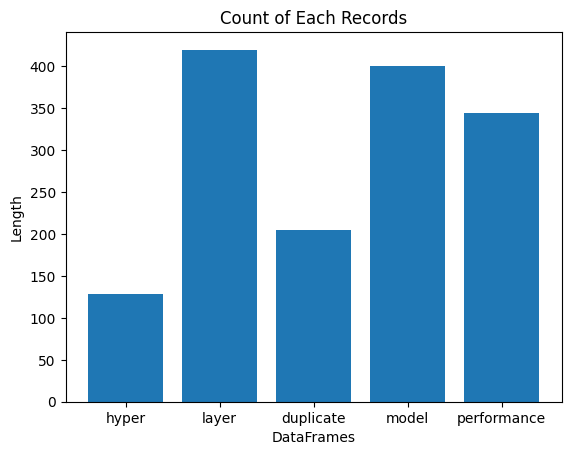

In [75]:

# Creating a list of dataframes
dataframes = [df_hyper, df_layer, df_duplicate, df_model, df_performance]

# Getting the lengths of each dataframe
lengths = [len(df) for df in dataframes]

# Creating a bar graph
plt.bar(range(1, len(dataframes) + 1), lengths, tick_label=['hyper', 'layer', 'duplicate', 'model', 'performance'])
plt.xlabel('DataFrames')
plt.ylabel('Length')
plt.title('Count of Each Records')
plt.show()

In [66]:
combined_df.to_excel('MLTD_NEW_apr24.xlsx',index=False)

In [67]:
combined_df

,Comments,hyper,layer,duplicate,model,performance
0,with hyperparameters functionname returns para...,1,0,0,0,0
1,perrone et al 2018 a tutorial on how to...,1,0,0,0,0
2,we can see all the hyperparameter names in the...,1,0,0,0,0
3,expert learning this module regroups a vari...,1,0,0,0,0
4,fixme 2 assumes hyperthreading fix this properly,1,0,0,0,0
...,...,...,...,...,...,...
2530,todo performance optimize this by only creatin...,0,0,0,0,1
2531,is added as it would likely degrade performance,0,0,0,0,1
2532,theres performance issues with a large amount ...,0,0,0,0,1
2533,a productionquality purepython wsgi server wit...,0,0,0,0,1


In [68]:
import pandas as pd

In [69]:
df= pd.read_excel('MLTD.xlsx')

In [70]:
(df['hyper'] == 1).sum()

129

In [71]:
(df['layer'] == 1).sum()

420

In [72]:
(df['duplicate'] == 1).sum()

205

In [73]:
(df['model'] == 1).sum()

1437

In [74]:
(df['performance'] == 1).sum()

344